In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('./project/Ecommerce customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
y = df['Yearly Amount Spent']
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


# 선형회귀하기

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [6]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
R2= metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
score = lr.score(x_test, y_test)
print(MSE)
print(MAE)
print(score)
print(R2)

98.51592272569762
7.971145638710323
0.9857836921521119
0.9857836921521119


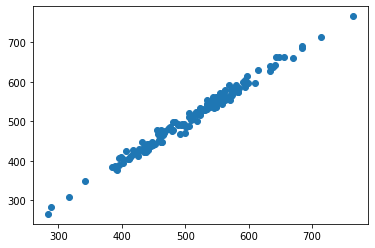

In [7]:
plt.scatter(y_pred, y_test)

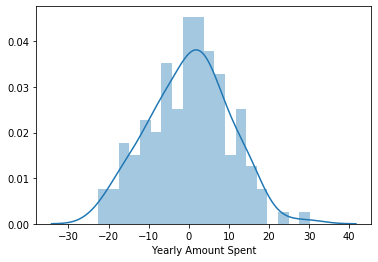

In [8]:
sns.distplot(y_pred - y_test, bins=20)

In [9]:
lr.coef_

array([25.59261936, 38.33779624,  0.3143062 , 61.2715054 ])

In [10]:
lr.intercept_

-1036.8011963490503

In [11]:
pd.DataFrame({'coef_': lr.coef_}, index=x.columns)

,coef_
Avg. Session Length,25.592619
Time on App,38.337796
Time on Website,0.314306
Length of Membership,61.271505


# Avatar... 의미없는듯..

In [12]:
avatar = df.Avatar
uqav = avatar.unique()

In [13]:
avatar_code = {a:i for i, a in enumerate(uqav)}
df['Avatar_code'] = df.Avatar.map(avatar_code)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar_code
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,0
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,1
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,2
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,3
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,4


# 라쏘분석

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
y_lasso = lasso.predict(x_test)

from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_lasso)
R2 = metrics.r2_score(y_test, y_lasso)
print(MSE)
print(R2)

108.95173144517442
0.9842777562049774


In [15]:
lasso.coef_

array([24.46314523, 37.26609998,  0.        , 60.30028602])

In [16]:
lasso.intercept_

-971.5705726472428

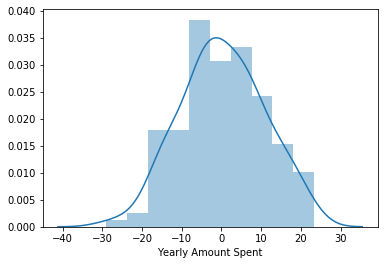

In [17]:
sns.distplot(y_test-y_lasso)

(array([  7.,  14.,  42.,  86., 137., 116.,  63.,  23.,   9.,   3.]),
 array([256.67058229, 307.55537025, 358.44015822, 409.32494618,
        460.20973415, 511.09452211, 561.97931008, 612.86409804,
        663.74888601, 714.63367397, 765.51846194]),
 <a list of 10 Patch objects>)

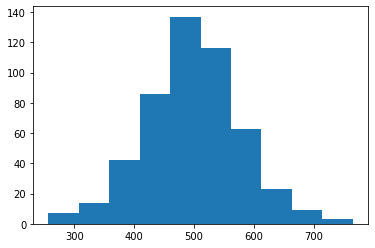

In [18]:
plt.hist(y)

# clustering과 classify

### clustering와 classify의 차이

In [19]:
df['Rank'] = df['Yearly Amount Spent'].apply(lambda x: x//200)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar_code,Rank
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,0,2.0
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,1,1.0
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,2,2.0
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,3,2.0
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,4,2.0


In [20]:
y = df.Rank
x = df[['Length of Membership', 'Time on App']]
x

,Length of Membership,Time on App
0,4.082621,12.655651
1,2.664034,11.109461
2,4.104543,11.330278
3,3.120179,13.717514
4,4.446308,12.795189
...,...,...
495,3.746573,13.566160
496,3.576526,11.695736
497,4.958264,11.499409
498,2.336485,12.391423


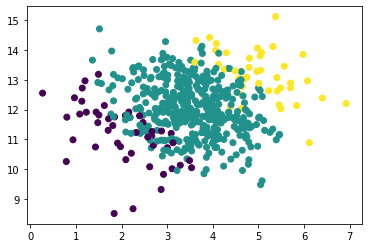

In [21]:
plt.scatter(x['Length of Membership'],x['Time on App'],  c=y)

In [22]:
np.unique(y)

array([1., 2., 3.])

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init='random', n_init=10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(x)

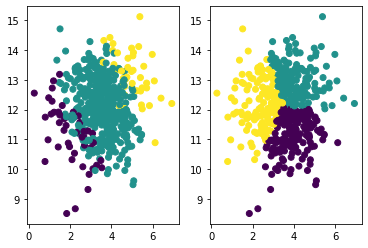

In [24]:
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.scatter(x['Length of Membership'],x['Time on App'],  c=y)
ax1.scatter(x['Length of Membership'],x['Time on App'],  c=y_km)

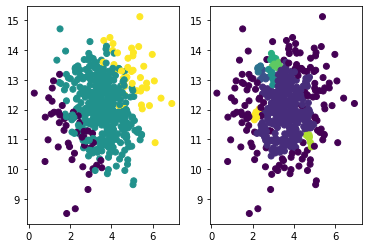

In [25]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(x)
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.scatter(x['Length of Membership'],x['Time on App'],  c=y)
ax1.scatter(x['Length of Membership'],x['Time on App'],  c=y_db)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', n_estimators=25, random_state=1, n_jobs=2) # n_job 사용할 CPU코어갯수 -1은 최대
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

print(np.unique(y_pred))
print(np.unique(y))

잘못 분류된 샘플 개수: 11
0.9266666666666666
[1. 2. 3.]
[1. 2. 3.]


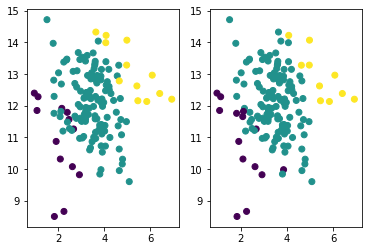

In [28]:
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.scatter(x_test['Length of Membership'],x_test['Time on App'],  c=y_test)
ax1.scatter(x_test['Length of Membership'],x_test['Time on App'],  c=y_pred)